<a href="https://colab.research.google.com/github/Subhajit53/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# **Introduction :**
##### In this era of hussle and bustle, everyone wants to save some time from their daily life. And for the people who wants to save some time for their relaxation or important meeting or a football match, road journeys are the main obstacles. In New York City, on an average, people spend around 54 minutes in public transports daily, and 55% among them spend above 2 hours. Average waiting time for public transports is around 13 minutes in New York City.
##### And here comes a scenario where this average time for arrival to destination is very important. Say, somebody has a very important meeting from 11 AM and he lives around 2 KMs away from his office. Now, he has to know how he should plan his journey (whether take a walk or taxi) and when he should get out from his home etc. That's why getting an estimate of EDA time is important is many situations.
##### Nowadays people can get that information from Google Maps or some online taxi service provider they are using.
##### Here, I want to model that EDA time using some supervised ML models and try to get an idea of how Google, OLA, Uber etc provide those EDA times.

# **Approach :**
##### To solve the problem, I have devised a 4-step approach below:

#### **1. Basic EDA :**
##### In this step, I want to do some exploration on the data. First, I shall check for null values and try to replace or remove them. Then, I shall check for outliers using boxplots and try to replace or remove them. Thirdly, I shall get some visualizations to get an idea of the varibales in hand.

#### **2. Feature Engineering :**
##### In this second step, I want come up with some features using the existing ones which might be better in explaining my dependent variable 'trip_duration'. And I shall plot a correlation heatmap to evaluate the relationship between variables. Also, I shall do some EDA on newly made variables and do some anomaly detection to make the model more robust.

#### **3. Model training :**
##### In this step, I shall get a train-test pair from the given dataset and fit 4 regression models to the train set. The models are namely : Linear Regression, Random Forests, Gradient Boosting Machine, Support Vector Machines.

#### **4. Model testing**
##### As the last step, I shall evaluate all the models and try to come up with a conclusion about which model might be the best choice here.

# **Analysis:**

### **Data Exporting and exploration :**

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset
taxi_df = pd.read_csv('/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Subhajit Ganguly/NYC Taxi Data.csv', index_col = 'id')

In [4]:
# Having a glance at the dataset
taxi_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
# Getting the shape of the dataset
taxi_df.shape

(1458644, 10)

In [6]:
# Getting an info of the dataset
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


## **1. Basic EDA :**

From the above info table and shape, it is clear that there are no null values present in the dataset. There goes a huge burden from my shoulders! Now, let's analyze further.

In [7]:
# Changing data type of datetimes
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])

In [8]:
# Getting a description of all the variables
taxi_df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,2016-03-04 08:07:34,2016-05-16 19:40:28,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
first,NaN,2016-01-01 00:00:17,2016-01-01 00:03:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-30 23:59:39,2016-07-01 23:02:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02


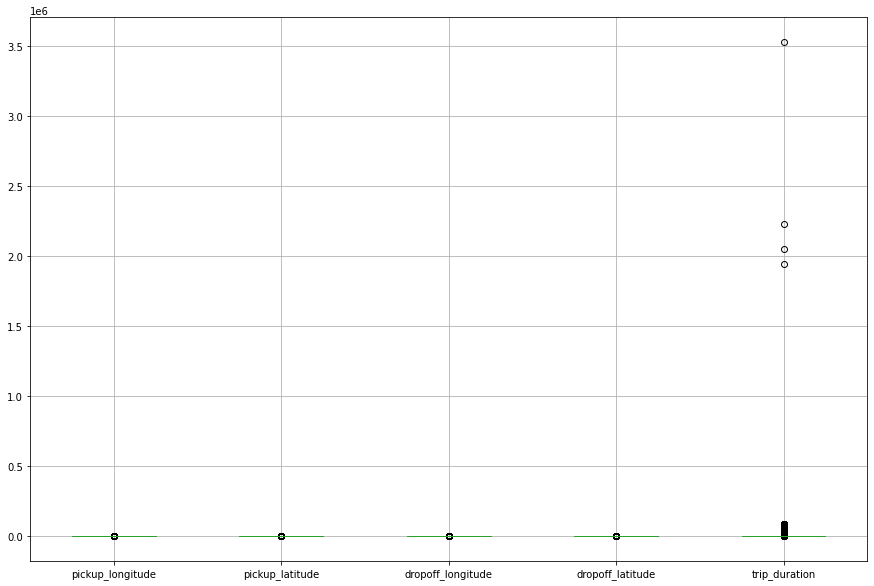

In [9]:
# Plot a boxplot to get an idea of absurd values
plt.figure(figsize=(15,10))
taxi_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']].boxplot()

We can see that there are no visible and distant outliers in the dataset except for trip_duration which is our dependent variable. Let's have a look at those 4 data points. 

In [10]:
# Sorting the dataset according to trip_duration
taxi_df.sort_values(by = ['trip_duration'], axis = 0, ascending = False)[:4]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282
id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736


We can see that those 4 values are in millions! Maybe they are of some out of the town and long journeys which are not part of normal routings. I have no hesitation to remove them!

In [11]:
# Deleting the rows with top 4 trip duration
taxi_df = taxi_df.sort_values(by = ['trip_duration'], axis = 0, ascending = False)[4:]

In [12]:
taxi_df[['trip_duration']].describe()

,trip_duration
count,1.458640e+06
mean,9.528153e+02
std,3.171322e+03
min,1.000000e+00
25%,3.970000e+02
50%,6.620000e+02
75%,1.075000e+03
max,8.639200e+04


This one lookes pretty good now! Now, let's check if there are some very low trip durations.

In [13]:
# Getting rows with trip duration less than 1 minute
taxi_df[taxi_df['trip_duration'] <= 60]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id1094398,2,2016-01-06 21:03:52,2016-01-06 21:04:52,1,-73.965988,40.762531,-73.962082,40.767712,N,60
id3745181,1,2016-01-18 23:01:11,2016-01-18 23:02:11,1,-73.947685,40.778572,-73.950653,40.779911,N,60
id2303511,1,2016-01-22 01:16:28,2016-01-22 01:17:28,1,-73.964157,40.807880,-73.966515,40.804478,N,60
id0941804,2,2016-03-15 18:51:19,2016-03-15 18:52:19,1,-74.001160,40.751999,-73.997276,40.755501,N,60
id2064163,1,2016-02-14 13:05:59,2016-02-14 13:06:59,1,-73.948608,40.782478,-73.953705,40.784546,N,60
...,...,...,...,...,...,...,...,...,...,...
id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1
id0008221,2,2016-05-16 14:42:18,2016-05-16 14:42:19,1,-73.787086,40.647388,-73.789780,40.646992,N,1
id3563137,2,2016-04-15 17:32:22,2016-04-15 17:32:23,1,-73.782417,40.644154,-73.782433,40.644169,N,1


Okay, now this one looks like some errorenous inputs have been given. We can see that the person has travelled with respect to long-lat but his/her trip time was somehow inputted as 1 errorenously. Even there are some durations less than 60 seconds. I mean no one can just get into a taxi and get out of it in a minute, right? I shall not remove them now but see what I can do with some anomaly detection.

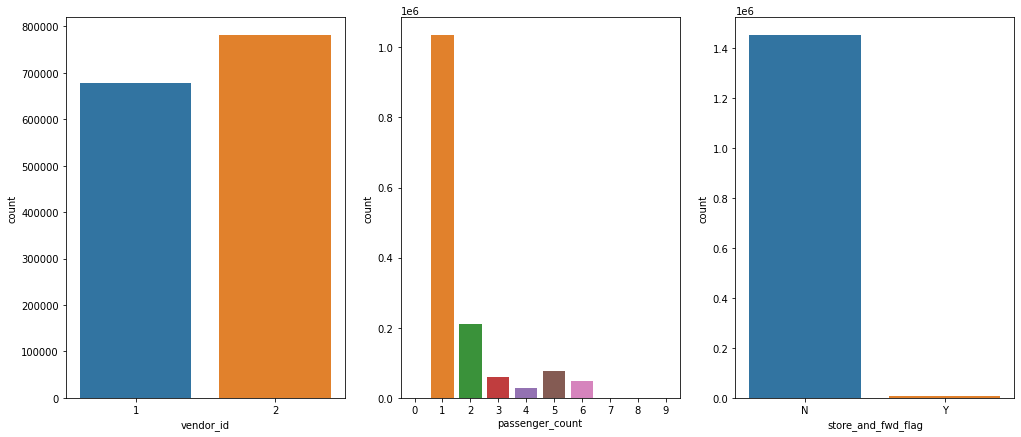

In [15]:
# Plotting barplots for categorical columns
plt.figure(figsize=(17,7))

plt.subplot(1,3,1)
sns.countplot(data = taxi_df, x = 'vendor_id')

plt.subplot(1,3,2)
sns.countplot(data = taxi_df, x = 'passenger_count')

plt.subplot(1,3,3)
sns.countplot(data = taxi_df, x = 'store_and_fwd_flag')